# **Setup**

## Import notebooks

In [1]:
%%capture
# Note the python import here
import reuse, sys

# This is the Ipython hook
sys.meta_path.append(reuse.NotebookFinder())
from dataset_balancing import X_train, X_test, y_train, y_test

## Import libraries

In [2]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Feature selection**

## Filter Method

### Variance Threshold

In [3]:
selector = VarianceThreshold()
selector.fit_transform(X_train)
selector.variances_

array([3.52729416e-01, 1.44055700e+06, 6.73852724e+00, 2.38703153e-01,
       2.24836271e-01, 1.08825049e-01, 1.95080065e-01, 9.99990000e+04,
       3.90000000e+03, 5.75279633e-01, 7.50358515e-02, 2.05433348e-01,
       1.28875976e-01, 3.32867282e-04, 1.17931456e-01, 2.49172327e-01,
       1.65654163e-01, 2.13662344e-02, 9.04472097e-02, 7.13395278e-02,
       5.80981246e-02])

### SelectKBest

In [4]:
#k_list = list(range(1, 21))

#accuracy_scores = []

#for k_value in k_list:
#    selector = SelectKBest(f_classif, k=k_value)
#    selector.fit(X_train, y_train)
#    cols = selector.get_support(indices=True)
#    cols_names = list(X_train.columns[cols])

#    temp_train = X_train[cols_names]
#    temp_test = X_test[cols_names]

#    clf_model = SVC(random_state=0)

#    clf_model.fit(temp_train,y_train)
#    score = clf_model.score(temp_test,y_test)
    
#    accuracy_scores.append(score)

#optimal_k = k_list[accuracy_scores.index(max(accuracy_scores))]
#print(f"The optimal k is {optimal_k} and the accuracy score is {max(accuracy_scores)}")

#selector = SelectKBest(f_classif, k=optimal_k)
#selector.fit(X_train, y_train)
#cols = selector.get_support(indices=True)
#cols_names = list(X_train.columns[cols])

#for idx, (ci, cn) in enumerate(zip(cols, cols_names)):
#    print("*" * (len(cols) - idx) + " " * idx, ci, cn)

#plt.figure(figsize=(12, 6))
#plt.plot(range(1, 21), accuracy_scores, color='red', linestyle='dashed', marker='o',
#         markerfacecolor='blue', markersize=10)
#plt.title('Accuracy vs K Value')
#plt.xlabel('K Value')
#plt.ylabel('Accuracy')
#plt.savefig('images/other/selectkbest.png', dpi=200)

## Wrapper Method

### Recursive Feature Elimination

In [5]:
model = LogisticRegression(solver='lbfgs',max_iter=5000, random_state=0)
rfe = RFE(model,step=1)
rfe.fit(X_train,y_train)
print('Optimal number of features: {}'.format(rfe.n_features_))
cols = rfe.get_support(indices=True)
cols_names = list(X_train.columns[cols])
tabela = pd.DataFrame({'Feature':cols_names})
tabela.to_latex(buf="tables/rfe.tex", caption=("Características selecionadas pelo método \\textit{RFE}"))
tabela

Optimal number of features: 10


,Feature
0,age
1,marital-status
2,occupation
3,sex
4,hours-per-week
5,workclass_others
6,relationship_ Husband
7,relationship_ Other-relative
8,relationship_ Own-child
9,relationship_ Wife


## Embedded method

### Principal Component Analysis

Optimal number of components: 19


,Feature
0,age
1,fnlwgt
2,education-num
3,marital-status
4,occupation
5,race
6,sex
7,capital-gain
8,capital-loss
9,hours-per-week


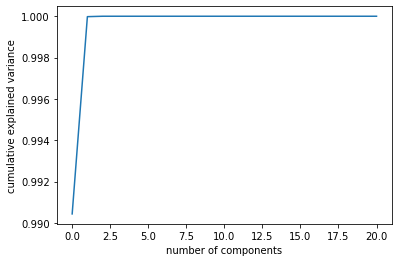

In [6]:
pca=PCA(random_state=0)
fit=pca.fit(X_train)
cumulative_variances = np.cumsum(pca.explained_variance_ratio_)
maximum = max(cumulative_variances)
index_of_maximum = np.where(cumulative_variances == maximum)
print(f"Optimal number of components: {index_of_maximum[0][0]+1}")
tabela = pd.DataFrame({'Feature':X_train.columns[0:19]})
tabela.to_latex(buf="tables/pca.tex", caption=("Características selecionadas pelo método \\textit{PCA}"))
display(tabela)
plt.plot(cumulative_variances)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('images/other/pca.png', dpi=200)

### Feature Importance

In [7]:
model = ExtraTreesClassifier(n_estimators=21, random_state=0)
model.fit(X_train, y_train)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], X_train.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 1 - fnlwgt (0.330851)
2. feature 2 - education-num (0.115385)
3. feature 3 - marital-status (0.097309)
4. feature 15 - relationship_ Husband (0.065748)
5. feature 7 - capital-gain (0.064775)
6. feature 4 - occupation (0.064027)
7. feature 0 - age (0.052612)
8. feature 9 - hours-per-week (0.048835)
9. feature 16 - relationship_ Not-in-family (0.030828)
10. feature 18 - relationship_ Own-child (0.026898)
11. feature 8 - capital-loss (0.021018)
12. feature 20 - relationship_ Wife (0.017708)
13. feature 6 - sex (0.015783)
14. feature 5 - race (0.010138)
15. feature 19 - relationship_ Unmarried (0.009578)
16. feature 10 - native-country (0.009058)
17. feature 11 - workclass_Private (0.006268)
18. feature 14 - workclass_selfempl (0.004944)
19. feature 12 - workclass_gov (0.004864)
20. feature 17 - relationship_ Other-relative (0.003096)
21. feature 13 - workclass_others (0.000276)


## Drop irrelevant features

In [8]:
X_train = X_train.drop(['fnlwgt', 'relationship_ Not-in-family', 'workclass_selfempl'],1)
X_test = X_test.drop(['fnlwgt', 'relationship_ Not-in-family', 'workclass_selfempl'],1)